In [105]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path.cwd().resolve().parent / "src"))

from project_setup import get_project_root, make_paths, new_run_dir, save_data
from plotting import savefig

root = get_project_root()
paths = make_paths(root)
run_dir = new_run_dir(paths, label="week_2")

print(f"Project root: {paths.root}")
print(f"Run directory: {run_dir}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project root: /Users/david/Code/msc
Run directory: /Users/david/Code/msc/outputs/runs/week_2


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv(paths.data_external / "week_2_sample.csv")

In [107]:
def ra_to_degrees(ra):
    arr = ra.split(':')
    hours = float(arr[0])
    mins = float(arr[1])
    secs = float(arr[2])
    
    return hours * 15 + mins / 4 + secs / 240

def dec_to_degrees(dec):
    sign = 1 if dec[0] == '+' else -1
    arr = dec[1:].split(':')
    degrees = float(arr[0])
    mins = float(arr[1])
    secs = float(arr[2])
    
    return sign * (degrees + mins / 60 + secs / 3600)

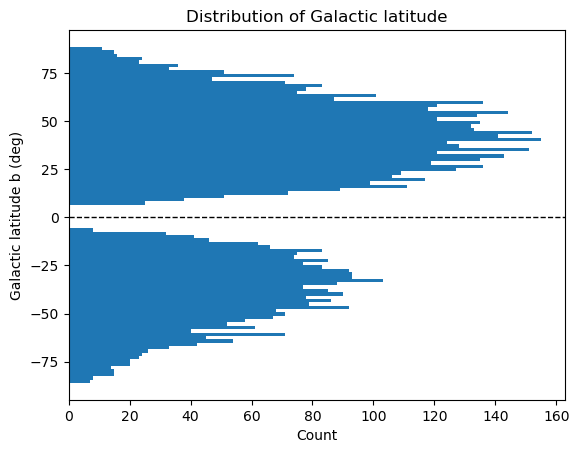

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/bin_galactic_latitude.png')

In [108]:
# plot galactic latitude
from turtle import color


df['b'] = pd.to_numeric(df['b'], errors='coerce')
d = df.dropna(subset=['b'])

fig = plt.figure()
plt.hist(d['b'], bins=100, orientation='horizontal')
plt.ylabel('Galactic latitude b (deg)')
plt.xlabel('Count')
plt.title('Distribution of Galactic latitude')
plt.axhline(0, linewidth=1, color='black', linestyle='--')  # mark the Galactic plane
plt.show()


savefig(fig, run_dir, "bin_galactic_latitude")


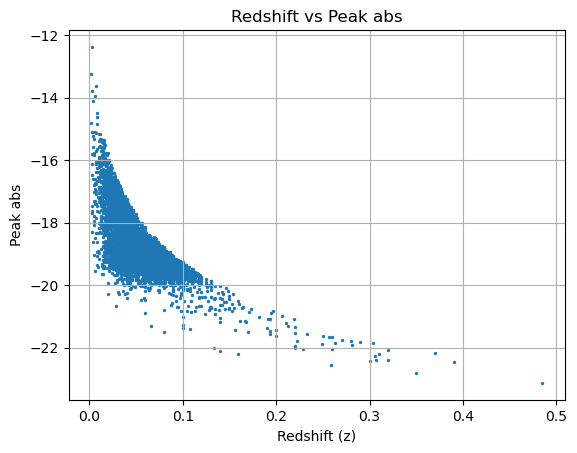

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/redshift_vs_peakabs.png')

In [79]:
# Plot Redshift vs peak absolute mag

df['peakabs']  = pd.to_numeric(df['peakabs'],  errors='coerce') 
df['redshift'] = pd.to_numeric(df['redshift'], errors='coerce')
df_plot = df.dropna(subset=['redshift', 'peakabs'])

fig = plt.figure()
plt.scatter(df_plot['redshift'], df_plot['peakabs'], s=2)
plt.xlabel('Redshift (z)')
plt.ylabel('Peak abs')
plt.title('Redshift vs Peak abs')
plt.grid(True)
plt.show()

savefig(fig, run_dir, "redshift_vs_peakabs")


Plot saved. Total points: 7056 (removed 14 rows with invalid data)


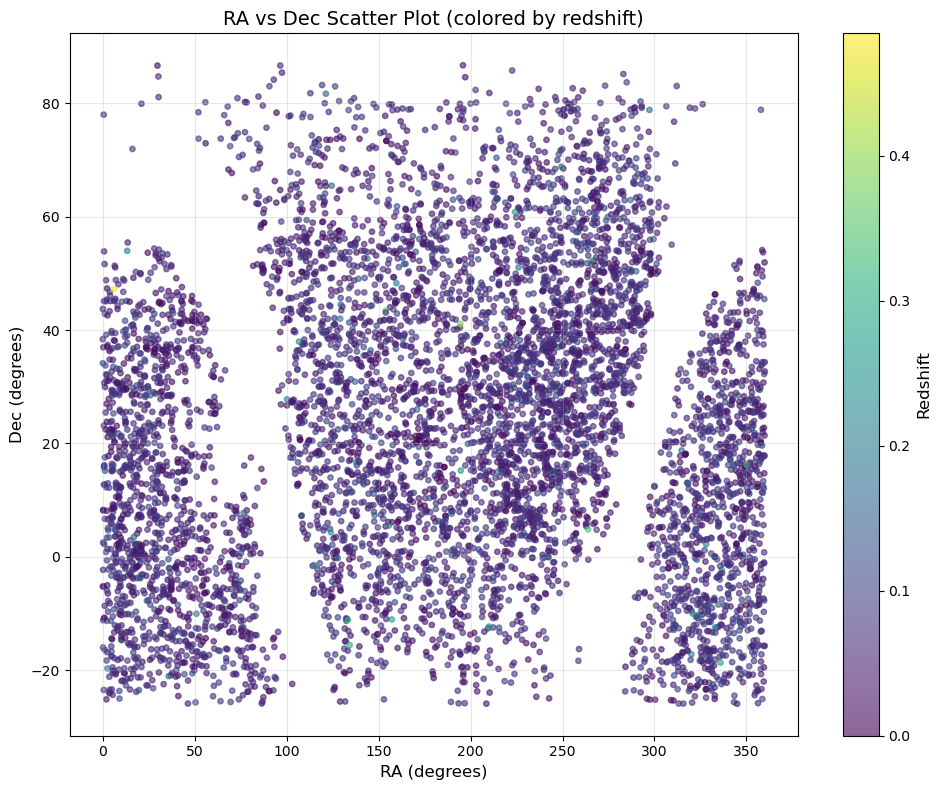

In [80]:
# Plot scatter RA vs Dec
# Apply conversions
df['RA_deg'] = df['RA'].apply(ra_to_degrees)
df['Dec_deg'] = df['Dec'].apply(dec_to_degrees)

# Convert redshift to numeric
df['redshift'] = pd.to_numeric(df['redshift'], errors='coerce')

# Filter out rows with invalid redshift values
df_scat = df.dropna(subset=['redshift', 'RA_deg', 'Dec_deg'])

# Create scatter plot with redshift as color
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(df_scat['RA_deg'], df_scat['Dec_deg'], c=df_scat['redshift'], alpha=0.6, s=15, cmap='viridis')
ax.set_xlabel('RA (degrees)', fontsize=12)
ax.set_ylabel('Dec (degrees)', fontsize=12)
ax.set_title('RA vs Dec Scatter Plot (colored by redshift)', fontsize=14)
ax.grid(True, alpha=0.3)

# Add colorbar using matplotlib
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Redshift', fontsize=12)

savefig(fig, run_dir, "ra_dec_scatter_redshift")

print(f"Plot saved. Total points: {len(df_scat)} (removed {len(df) - len(df_scat)} rows with invalid data)")

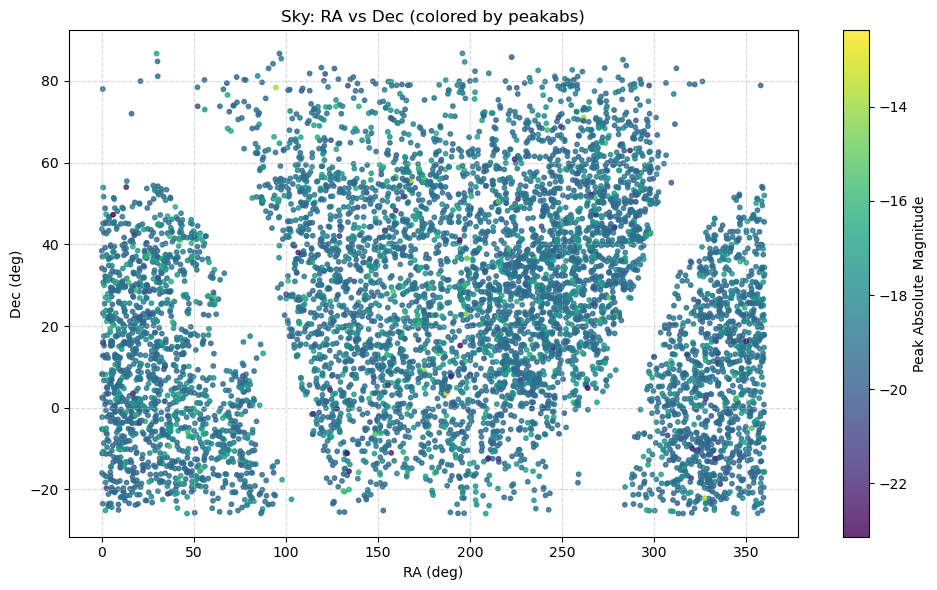

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/sky_ra_dec_peakabs.png')

In [110]:
def scatter_cbar(x, y, c, xlabel, ylabel, title, cmap='viridis'):
    plt.figure(figsize=(10, 6))
    sc = plt.scatter(x, y, c=c, cmap=cmap, s=10, alpha=0.8)
    cbar = plt.colorbar(sc)
    cbar.set_label('Peak Absolute Magnitude')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.5)
    

    filename = title.replace(" ", "_").replace(":", "").lower()
    if 'run_dir' in globals():
        savefig(plt.gcf(), run_dir, filename)
    plt.show()

df['peakabs'] = pd.to_numeric(df['peakabs'], errors='coerce')

if 'RA_deg' not in df.columns:
    df['RA_deg'] = df['RA'].apply(ra_to_degrees)
if 'Dec_deg' not in df.columns:
    df['Dec_deg'] = df['Dec'].apply(dec_to_degrees)


d = df.dropna(subset=['RA_deg', 'Dec_deg', 'peakabs'])

scatter_cbar(d['RA_deg'], d['Dec_deg'], d['peakabs'],'RA (deg)', 'Dec (deg)', 'Sky: RA vs Dec (colored by peakabs)')
savefig(fig, run_dir, "sky_ra_dec_peakabs")

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/extinction_vs_latitude.png')

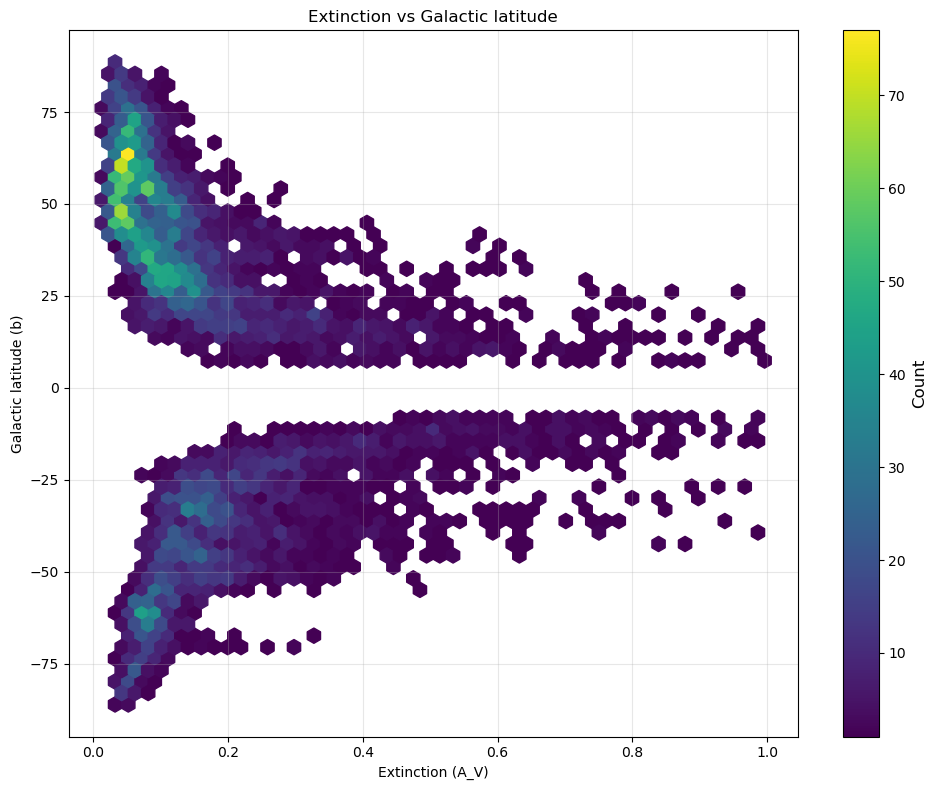

In [ ]:

# extinction vs latitude
df['A_V']  = pd.to_numeric(df['A_V'],  errors='coerce') 
df['b'] = pd.to_numeric(df['b'], errors='coerce')
df_plot = df.dropna(subset=['A_V', 'b'])

fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(df_plot['A_V'], df_plot['b'], gridsize=50, cmap='viridis', mincnt=1)
ax.set_xlabel('Extinction (A_V)')
ax.set_ylabel('Galactic latitude (b)')
ax.set_title('Extinction vs Galactic latitude')
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = fig.colorbar(hb, ax=ax)
cbar.set_label('Count', fontsize=12)

savefig(fig, run_dir, "extinction_vs_latitude")

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/rise_vs_fade.png')

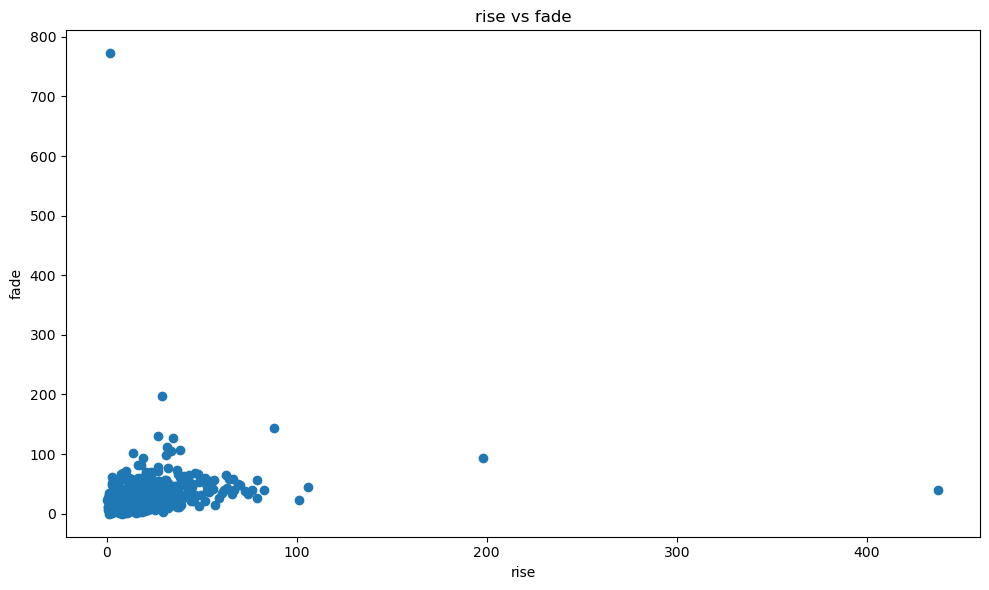

In [ ]:
# Use pd.to_numeric with errors='coerce'
df['rise'] = pd.to_numeric(df['rise'], errors='coerce')
df['fade'] = pd.to_numeric(df['fade'], errors='coerce')

# Drop rows where rise or fade is NaN
df_plot = df.dropna(subset=['rise', 'fade'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_plot['rise'], df_plot['fade'])
ax.set_xlabel('rise')
ax.set_ylabel('fade')
ax.set_title('rise vs fade')

savefig(fig, run_dir, "rise_vs_fade")

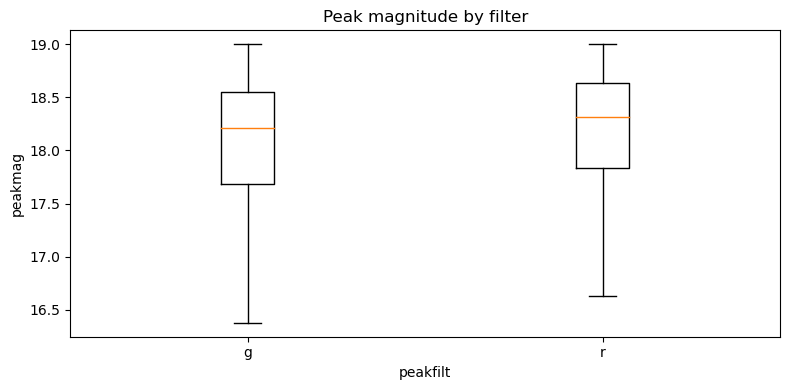

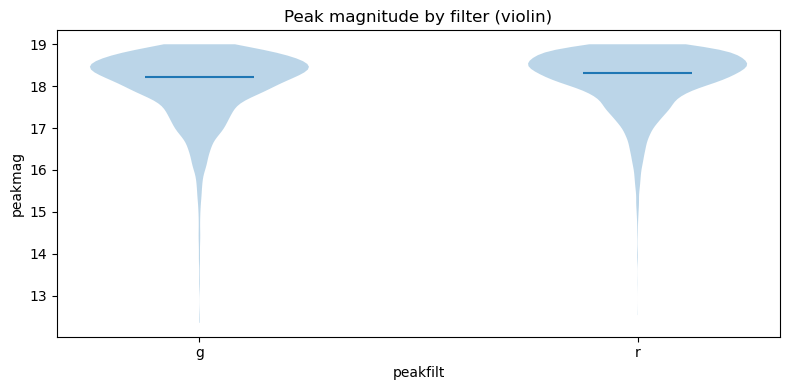

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/peakmag_by_filter.png')

In [ ]:
# Coerce to usable types
df['peakmag'] = pd.to_numeric(df['peakmag'], errors='coerce')
df['peakfilt'] = df['peakfilt'].astype(str)

d = df.dropna(subset=['peakmag', 'peakfilt'])

# Order filters by median peakmag
order = (
    d.groupby('peakfilt')['peakmag']
     .median()
     .sort_values()
     .index
     .tolist()
)

data = [d.loc[d['peakfilt'] == f, 'peakmag'].values for f in order]

fig = plt.figure(figsize=(8, 4))
plt.boxplot(data, labels=order, showfliers=False)
plt.xlabel('peakfilt')
plt.ylabel('peakmag')
plt.title('Peak magnitude by filter')
plt.tight_layout()
plt.show()
savefig(fig, run_dir, "peakmag_by_filter_boxplot")

# and in violin plot
fig = plt.figure(figsize=(8, 4))
plt.violinplot(data, showmeans=False, showmedians=True, showextrema=False)
plt.xticks(range(1, len(order) + 1), order)
plt.xlabel('peakfilt')
plt.ylabel('peakmag')
plt.title('Peak magnitude by filter (violin)')
plt.tight_layout()
plt.show()

savefig(fig, run_dir, "peakmag_by_filter")



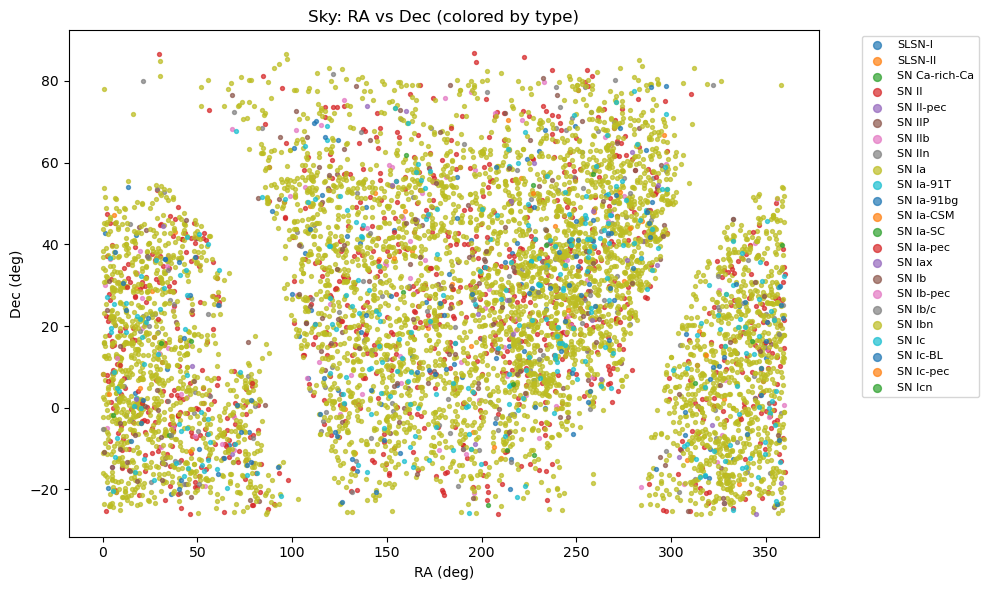

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/sky_ra_dec.png')

In [113]:

df['RA_deg'] = df['RA'].apply(ra_to_degrees)
df['Dec_deg'] = df['Dec'].apply(dec_to_degrees)

df_clean = df.dropna(subset=['RA_deg', 'Dec_deg', 'type'])

plt.figure(figsize=(10, 6))
# Group by 'type'
for t, g in df_clean.groupby('type'):
    plt.scatter(g['RA_deg'], g['Dec_deg'], s=8, alpha=0.7, label=str(t))

plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Sky: RA vs Dec (colored by type)')
plt.legend(markerscale=2, fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

savefig(fig, run_dir, "sky_ra_dec")

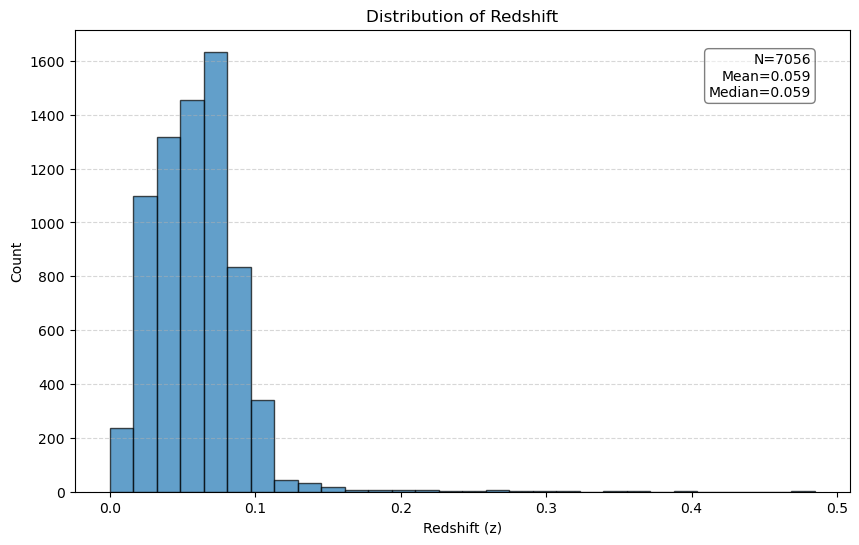

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/redshift.png')

In [115]:

fig, ax = plt.subplots(figsize=(10, 6))

df['redshift'] = pd.to_numeric(df['redshift'], errors='coerce')
d_z = df.dropna(subset=['redshift'])

counts, bins, patches = plt.hist(d_z['redshift'], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('Redshift (z)')
plt.ylabel('Count')
plt.title('Distribution of Redshift')
plt.grid(axis='y', linestyle='--', alpha=0.5)

textstr = f'N={len(d_z)}\nMean={d_z["redshift"].mean():.3f}\nMedian={d_z["redshift"].median():.3f}'
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

savefig(fig, run_dir, "redshift")

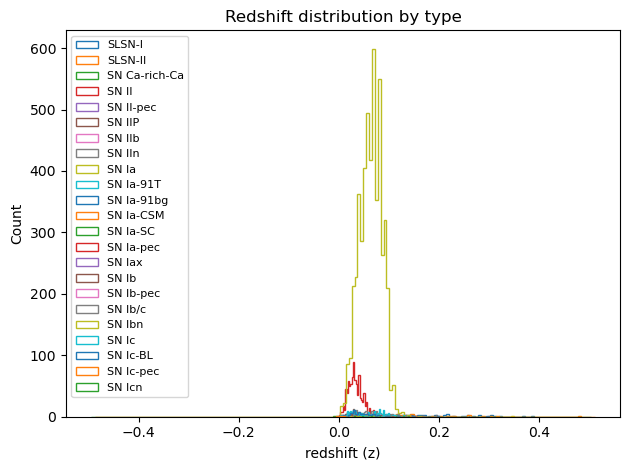

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/redshift_by_type.png')

In [116]:
d = df.dropna(subset=['redshift', 'type'])

fig = plt.figure()
for t, g in d.groupby('type'):
    plt.hist(g['redshift'], bins=60, histtype='step', linewidth=1, label=str(t))
plt.xlabel('redshift (z)')
plt.ylabel('Count')
plt.title('Redshift distribution by type')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

savefig(fig, run_dir, "redshift_by_type")

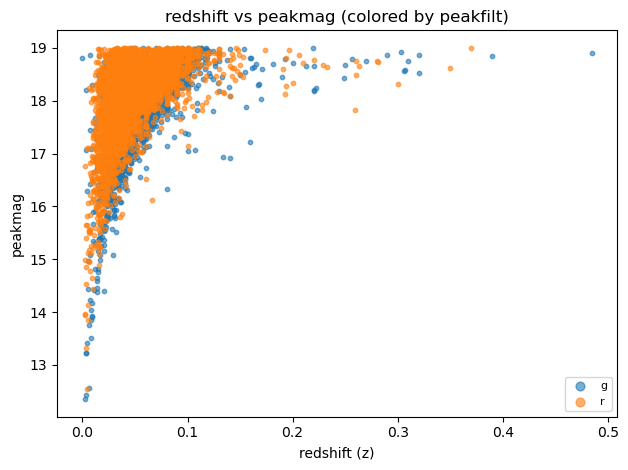

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/redshift_vs_peakmag.png')

In [117]:
d = df.dropna(subset=['redshift', 'peakmag', 'peakfilt']).copy()
d['peakfilt'] = d['peakfilt'].astype(str)

fig = plt.figure()
for f, g in d.groupby('peakfilt'):
    plt.scatter(g['redshift'], g['peakmag'], s=10, alpha=0.6, label=str(f))
plt.xlabel('redshift (z)')
plt.ylabel('peakmag')
plt.title('redshift vs peakmag (colored by peakfilt)')
plt.legend(markerscale=2, fontsize=8)
plt.tight_layout()
plt.show()

savefig(fig, run_dir, "redshift_vs_peakmag")

PosixPath('/Users/david/Code/msc/outputs/runs/week_2/figures/scatter_matrix.png')

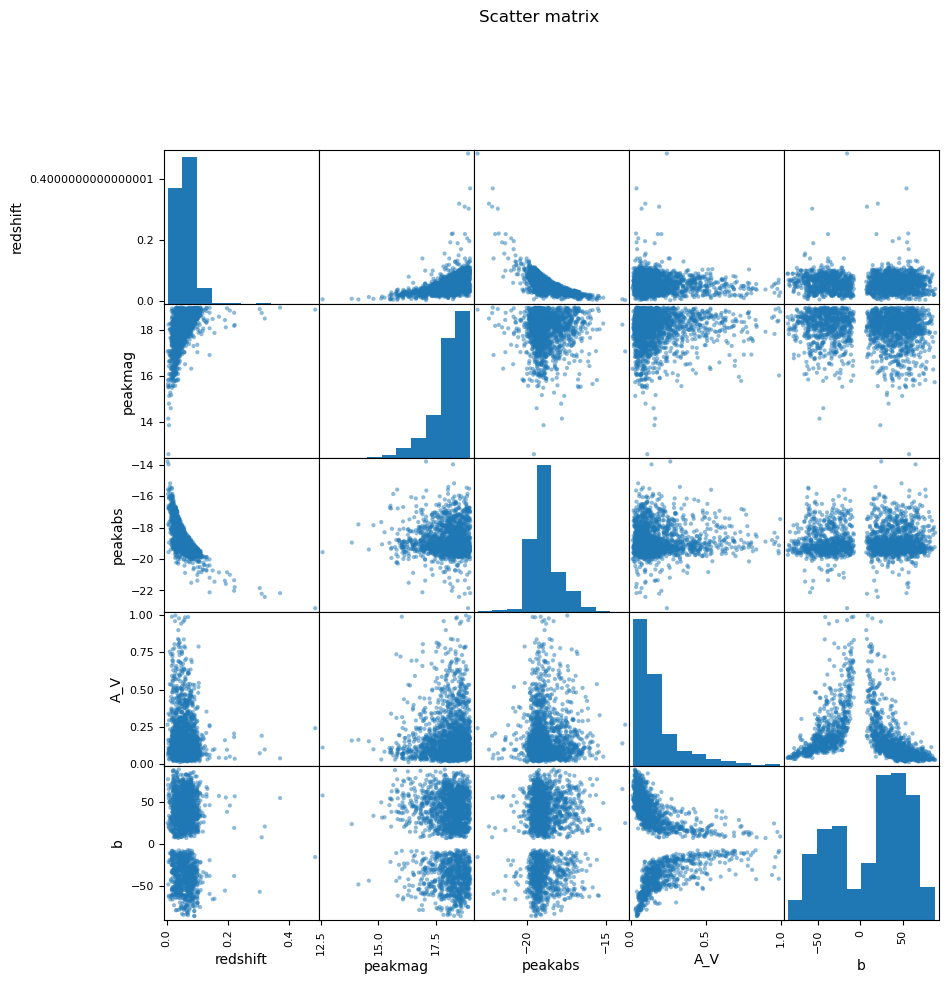

In [118]:
cols = ['redshift','peakmag','peakabs','duration','rise','fade','A_V','b']
d = df[cols].dropna()

# limit points if huge
d = d.sample(n=min(len(d), 2000), random_state=0)

pd.plotting.scatter_matrix(d, figsize=(10, 10), diagonal='hist')
plt.suptitle('Scatter matrix', y=1.02)
savefig(fig, run_dir, "scatter_matrix")
